In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas_datareader import DataReader
%matplotlib inline

In [2]:
Apple = DataReader("AAPL", "yahoo", start=datetime.datetime(2010, 1, 1), end=datetime.datetime(2015,12,31)) 
Apple.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


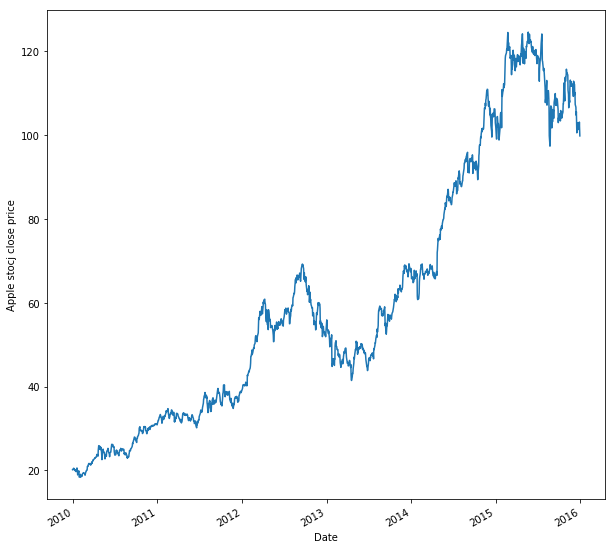

In [3]:
close = Apple['Adj Close']
plt.figure(figsize= (10,10))
close.plot()
plt.ylabel("Apple stocj close price")
plt.show()

In [4]:
moving_average = close.rolling(window=20).mean()

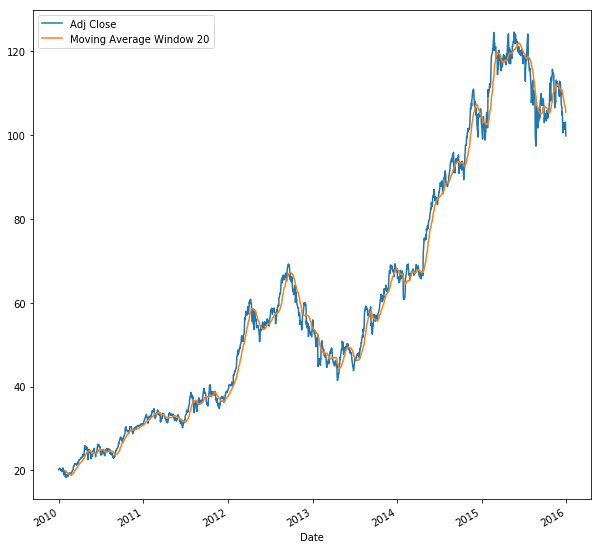

In [5]:
plt.figure(figsize= (10,10))
close.plot(label='Adj Close')
moving_average.plot(label='Moving Average Window 20')
plt.legend(loc='best')
plt.show()

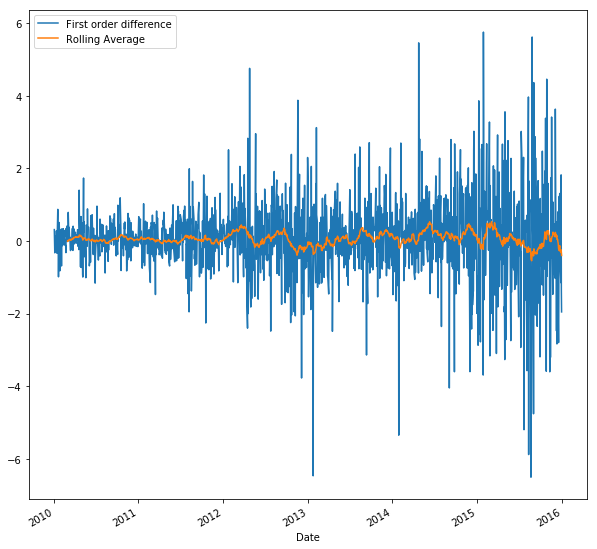

In [6]:
fod = close.diff()
plt.figure(figsize= (10,10))
fod.plot(label='First order difference')
fod.rolling(window=40).mean().plot(label='Rolling Average')
plt.legend(loc='best')
plt.show()

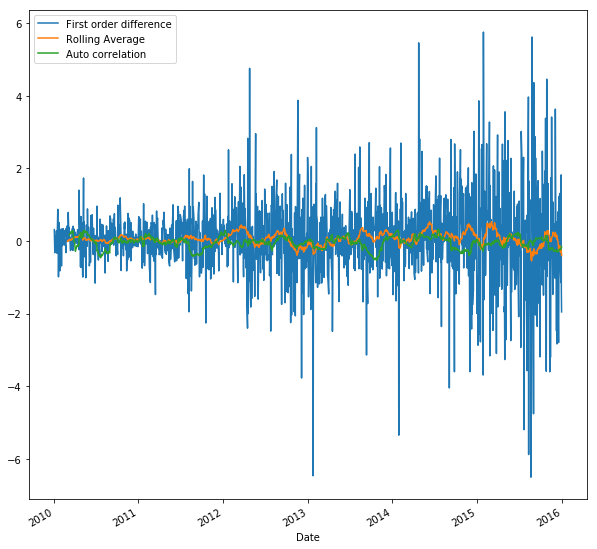

In [7]:
# Autocorrelation
plt.figure(figsize= (10,10))
fod.plot(label='First order difference')
fod.rolling(window=40).mean().plot(label='Rolling Average')
fod.rolling(window=40).corr(fod.shift(5)).plot(label='Auto correlation')
plt.legend(loc='best')
plt.show()


In [8]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
def normalize(data):
    x = data.values.reshape(-1,1)
    pre_process = MinMaxScaler()
    x_normalized = pre_process.fit_transform(x)
    return x_normalized

x_norm = normalize(close)


<Figure size 1440x1440 with 0 Axes>

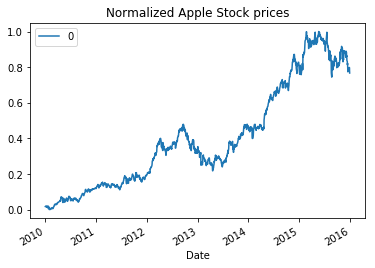

In [14]:
plt.figure(figsize= (20,20))
pd.DataFrame(x_norm, index = close.index).plot()
plt.title("Normalized Apple Stock prices")
plt.show()


In [10]:
# Create window from the normalized data
def window_transform(series, window_size):
    X = []
    y = []

    # Take values from the given series and generate a sequence input/output pairs
    #  x= <s1,s2,s3,s4,s5,... s_n>    y = s_n+1 and so on
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])

    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)

    return X,y

window_size = 7
X,y = window_transform(x_norm,window_size = window_size)

In [11]:
X [:5]

array([[0.01682023, 0.01977367, 0.02010685, 0.01703634, 0.01668515,
        0.0179458 , 0.01626199],
       [0.01977367, 0.02010685, 0.01703634, 0.01668515, 0.0179458 ,
        0.01626199, 0.01410988],
       [0.02010685, 0.01703634, 0.01668515, 0.0179458 , 0.01626199,
        0.01410988, 0.01674818],
       [0.01703634, 0.01668515, 0.0179458 , 0.01626199, 0.01410988,
        0.01674818, 0.01564966],
       [0.01668515, 0.0179458 , 0.01626199, 0.01410988, 0.01674818,
        0.01564966, 0.01249811]])

In [12]:
y[:5]

array([[0.01410988],
       [0.01674818],
       [0.01564966],
       [0.01249811],
       [0.0207011 ]])